In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
# Insspiration for tsne and top-k words: https://www.kaggle.com/code/jbencina/clustering-documents-with-tfidf-and-kmeans

In [2]:
# df = pd.read_csv('../All_Scraping/FOMC_Statements_and_Minutes.csv')
df = pd.read_csv('../Text_Scraping/FOMC_Statements_and_Minutes.csv')
df['Date'] = pd.to_datetime(df['Date']).astype('int64')
df

,Unnamed: 0,Date,Type,Text,year,quarter
0,0,949449600000000000,Minutes,\n\r\nA meeting of the Federal Open Market Com...,2000,1
1,1,953596800000000000,Minutes,\n\r\nA meeting of the Federal Open Market Com...,2000,1
2,2,958435200000000000,Minutes,\n\r\nA meeting of the Federal Open Market Com...,2000,2
3,3,962150400000000000,Minutes,\n\r\nA meeting of the Federal Open Market Com...,2000,2
4,4,966902400000000000,Minutes,\n\r\nA meeting of the Federal Open Market Com...,2000,3
...,...,...,...,...,...,...
400,400,1528848000000000000,Statement,"\nThe Federal Reserve, the central bank of the...",2018,2
401,401,1533081600000000000,Statement,"\nThe Federal Reserve, the central bank of the...",2018,3
402,402,1537920000000000000,Statement,"\nThe Federal Reserve, the central bank of the...",2018,3
403,403,1541635200000000000,Statement,"\nThe Federal Reserve, the central bank of the...",2018,4


In [3]:
# Keeping the date, type, and text
df = df[['Date', 'Text', 'Type']]
df

,Date,Text,Type
0,949449600000000000,\n\r\nA meeting of the Federal Open Market Com...,Minutes
1,953596800000000000,\n\r\nA meeting of the Federal Open Market Com...,Minutes
2,958435200000000000,\n\r\nA meeting of the Federal Open Market Com...,Minutes
3,962150400000000000,\n\r\nA meeting of the Federal Open Market Com...,Minutes
4,966902400000000000,\n\r\nA meeting of the Federal Open Market Com...,Minutes
...,...,...,...
400,1528848000000000000,"\nThe Federal Reserve, the central bank of the...",Statement
401,1533081600000000000,"\nThe Federal Reserve, the central bank of the...",Statement
402,1537920000000000000,"\nThe Federal Reserve, the central bank of the...",Statement
403,1541635200000000000,"\nThe Federal Reserve, the central bank of the...",Statement


In [9]:
#Setting TFIDF Parameters

tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.9,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df.Text)
text = tfidf.transform(df.Text)

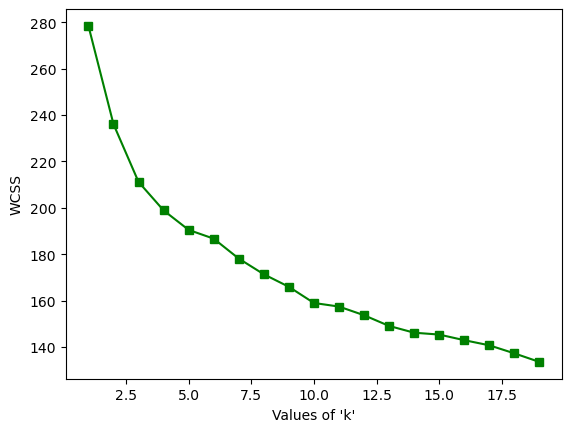

In [10]:
#Elbow method using WCSS

X = text.copy()
wcss = {} 
for i in range(1, 20): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 20, n_init = 'auto')
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [11]:
#Plot PCA and TSNE Function
def plot_tsne_pca(data, labels, n):
    max_label = max(labels)
    
    # PCA
    pca = PCA(n_components=2).fit_transform(np.asarray(data.todense()))

    # t-SNE
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(np.asarray(data.todense())))
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[:, 0], pca[:, 1], c=labels)
    ax[0].set_title('PCA Cluster Plot of Minutes and Statements. '+str(n)+' clusters.')
    
    ax[1].scatter(tsne[:, 0], tsne[:, 1], c=labels)
    ax[1].set_title('t-SNE Cluster Plot of Minutes and Statements. '+str(n)+' clusters.')
    
# plot_tsne_pca(text, clusters)

/Users/jonjafarnia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


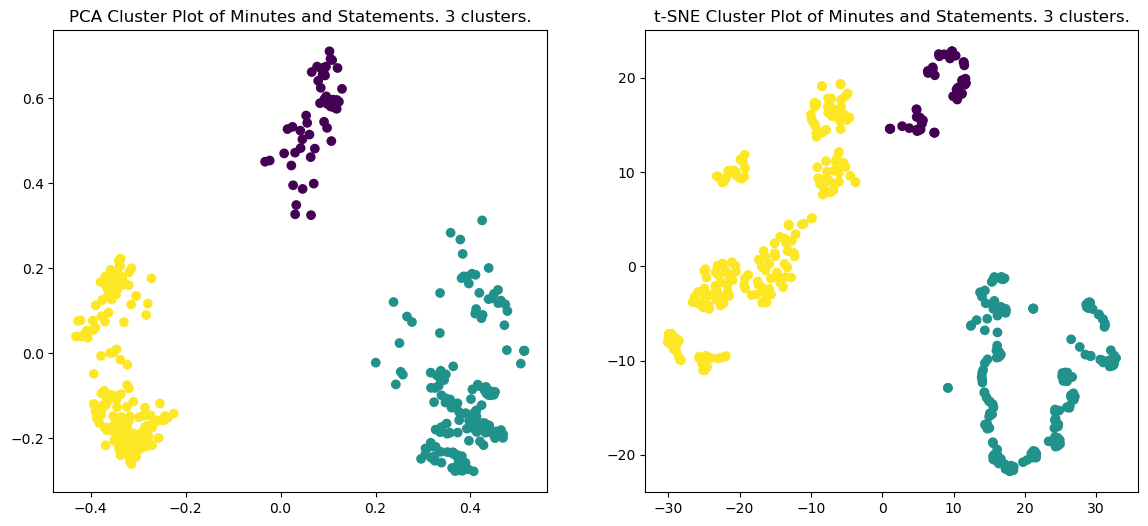

In [12]:
#Plotting 3 clusters
clusters = KMeans(n_clusters=3, random_state=20).fit_predict(text)
plot_tsne_pca(text, clusters, 3)

In [13]:
#Getting top 10 key words
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names_out(), 10)


Cluster 0
basis,alan,foreseeable,today,sustainable,roger,discount,believes,growth,jr

Cluster 1
structure,payment,conditions,securities,tools,reports,supervision,bank,data,financial

Cluster 2
continued,board,remained,growth,meeting,prices,period,quarter,members,participants
